1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.


The standard error of the mean is the standard deviation of the sample means if you repeatedly sampled from the population, and it reflects how much the sample mean is expected to vary from the true population mean.

On the other hand, the standard deviation of the original data measures the spread of the individual data points around the sample mean. It captures the variability within one single sample, not the variability of sample means across different samples.

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

To create a condidence interval: the first step is to calculate the standard error of the mean.The formula of calculating standard error of the mean is standard deviation divided by square root of sample size. Then, for a 95% confidence level, use the critical value from the standard normal distribution (Z-distribution) which is approximately 2. The final step is calculating the confidenct range interval:CI=Sample Mean±(2×SEM).

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

Firstly, generate a bootstrapped sample by resampling the original datas many times(reolacement is allowed), and then, calculate the mean of each resample. Secondly, form a histogram based on the resample means you collected.
Finnally, find the 2.5th percentile (lower bound) and the 97.5th percentile (upper bound) of the sorted bootstrapped means.The interval between these percentiles gives the 95% bootstrapped confidence interval, capturing the range within which 95% of the bootstrapped means lie. 

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Sample data (replace with your own sample data)
data = [12, 15, 14, 10, 18, 13, 17, 16, 11, 19]

# Function to calculate bootstrap confidence interval
def bootstrap_ci(data, num_bootstrap_samples=10000, ci_percentile=95, statistic=np.mean):
    np.random.seed(0)  # Set seed for reproducibility
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap_samples, len(data)), replace=True)
    
    # Calculate the statistic for each bootstrap sample (default: mean)
    bootstrap_statistics = np.apply_along_axis(statistic, 1, bootstrap_samples)
    
    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound

# Calculate 95% bootstrap confidence interval for the mean
mean_ci = bootstrap_ci(data)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# To calculate 95% bootstrap confidence interval for the median, change 'np.mean' to 'np.median':
median_ci = bootstrap_ci(data, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")

# You can similarly calculate confidence intervals for other statistics, e.g., np.std for the standard deviation


95% Bootstrap Confidence Interval for the Mean: (12.7, 16.3)
95% Bootstrap Confidence Interval for the Median: (12.0, 17.0)


Summary:In our chat, we discussed several statistical concepts related to confidence intervals and bootstrapping:

The standard error of the mean (SEM) and how it differs from the standard deviation of the original data.
How to use the SEM to calculate a 95% confidence interval for the mean, using the formula
CI=mean±1.96×SEM.
An alternative method for creating a 95% bootstrap confidence interval by resampling and using percentiles (without relying on SEM).
I provided Python code to calculate a 95% bootstrap confidence interval for a population mean and explained how to modify it for different statistics, like the median.
Finally, I explained how the use of the 2.5th and 97.5th percentiles of the bootstrap distribution creates the confidence interval.

https://chatgpt.com/share/66fdbffb-8744-8010-b55b-5b1bc23829fb

5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.


Because the population parameters is unknown at the most of time, but the sample statistic is fixed, so we can use sample statistic to estimate the interval of the population parameter. Confidence intervals use the sample statistic to provide a range of plausible values for the population parameter, acknowledging the uncertainty that comes from sampling.

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
1.What is the process of bootstrapping?
2.What is the main purpose of bootstrapping?
3.If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1.To create a bootstrapping, firstly you need to have a sample, and you randomly pick up data points many times from your oringinal sample (repeat is allowed). Finnally, using these resamples to form a histogram. If you want to go further, find the 2.5th percentile (lower bound) and the 97.5th percentile (upper bound) of a particular statistic.The interval between these percentiles gives the 95% bootstrapped confidence interval, capturing the range within which 95% of the particular statistic lie. 

2.The main purpose of bootstrapping is to estimate the sampling distribution of a statistic, such as the mean or standard error, by resampling from the observed data. Compared to other distribution methods, bootstrapped distribution avoids the waste of time and money.

3.To check you hypothesized, you can compare your hypothesized mean to the bootstrap distribution. If your hypothesized mean falls within a confidence interval (usually choose 95%) of the bootstrap means, it suggests that the hypothesized value is plausible. If it's far outside this interval, it indicates that the hypothesized mean is unlikely given the sample data.

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

Because sample has strong uncertainty, so the observed sample mean is not always consist with the average sample mean. And through resampling and calculation, we find a confidence interval of average sample mean, and this interval is more reliable for us to predict the range of average sample mean. So when 0 is in the inverval, we fail to reject the Null hypothesis.

When null value is not included in the confidence interval, we can reject the null hypothesis.

Summary:Bootstrapping: A statistical method that involves resampling from your data with replacement to estimate the distribution of a statistic (e.g., mean) and make inferences about the population.
Main purpose of bootstrapping: To estimate the variability and uncertainty of a statistic, particularly when the population distribution is unknown or assumptions about it are difficult to make.
Using bootstrapping for a hypothesized mean: If you have a hypothesized population mean, you can resample your data, calculate bootstrap sample means, and check if the hypothesized mean falls within a confidence interval of the bootstrap means. If it does, it supports the plausibility of your guess.

https://chatgpt.com/share/66fde4c0-9658-8010-bd05-5581140c5528

8.Vaccine Data Analysis Assignment
Overview

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

Data AliTech has released the following data.

PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
Deliverables While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are primarily interested in evaluating your report relative to the following deliverables.

A visual presentation giving some initial insight into the comparison of interest.
A quantitative analysis of the data and an explanation of the method and purpose of this method.
A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
The clarity of your documentation, code, and written report.
Consider organizing your report within the following outline template.

Problem Introduction
An explaination of the meaning of a Null Hypothesis of "no effect" in this context
Data Visualization (motivating and illustrating the comparison of interest)
Quantitative Analysis
Methodology Code and Explanations
Supporting Visualizations
Findings and Discussion
Conclusion regarding a Null Hypothesis of "no effect"
Further Considerations
Further Instructions

When using random functions, you should make your analysis reproducible by using the np.random.seed() function
Create a CSV file and read that file in with your code, but do not include the CSV file along with your submission

In this case, "Null Hypothesis" means the new vaccine has no effect on human's health.

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame

df['difference']=df.FinalHealthScore-df.InitialHealthScore
print(df)

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore  difference
0          1   45      M                  84                86           2
1          2   34      F                  78                86           8
2          3   29      M                  83                80          -3
3          4   52      F                  81                86           5
4          5   37      M                  81                84           3
5          6   41      F                  80                86           6
6          7   33      M                  79                86           7
7          8   48      F                  85                82          -3
8          9   26      M                  76                83           7
9         10   39      F                  83                84           1


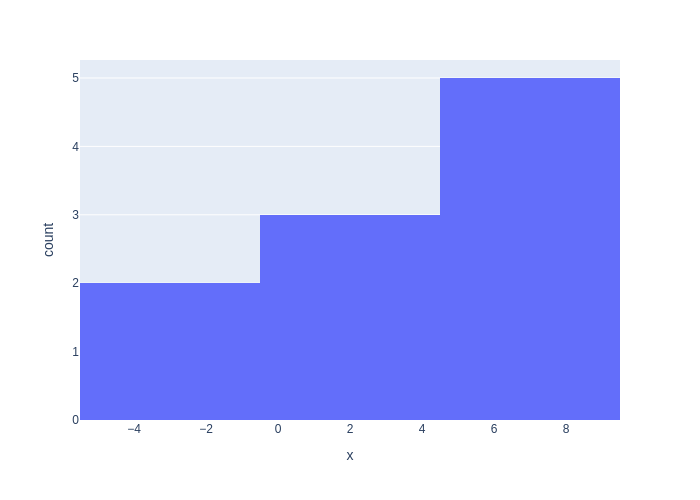

In [3]:

fig = px.histogram(pd.DataFrame({"x":df.difference}),x='x')
fig.show(renderer="png")


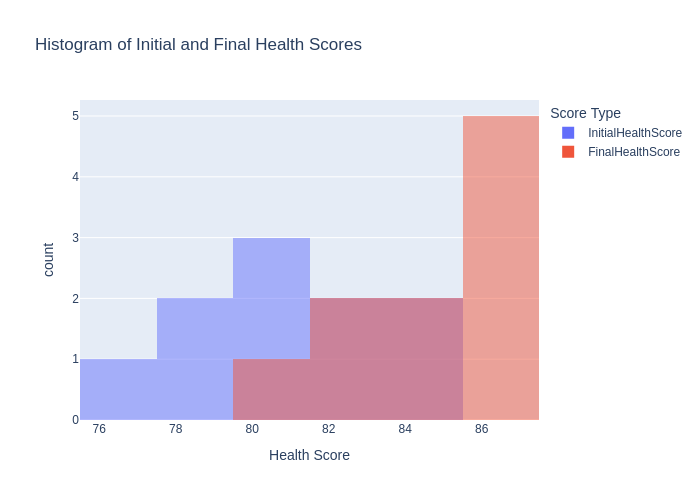

In [4]:
fig = px.histogram(df, 
                   x=['InitialHealthScore', 'FinalHealthScore'], 
                   nbins=10,
                   title="Histogram of Initial and Final Health Scores",
                   labels={"value": "Health Score", "variable": "Score Type"},
                   barmode="overlay")
fig.show(renderer="png")

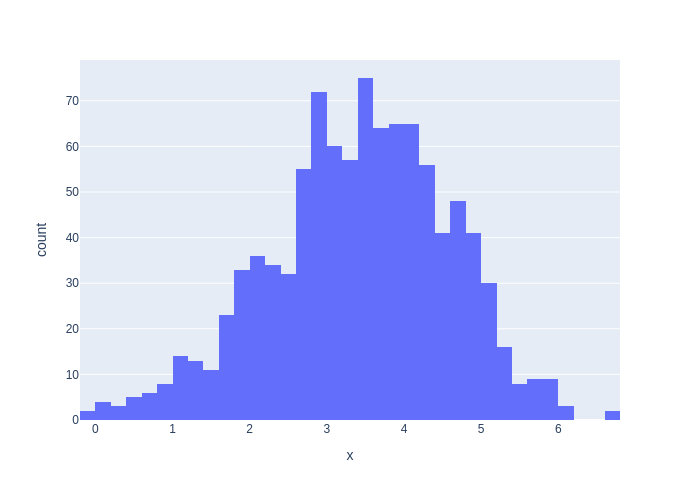

In [5]:
N=1000
boot_mean=np.zeros(N)
np.random.seed(0)
for i in range(N):
    boot_sample=np.random.choice(df.difference,size=len(df.difference),replace=True)
    boot_mean[i]=np.mean(boot_sample)
fig=px.histogram(pd.DataFrame({'x':boot_mean}),x='x') 
fig.show(renderer="png")

In [41]:
np.quantile(boot_mean,[0.025,0.975])

array([0.9, 5.5])

Conclusion: 'Null hypothesis' is rejected because 0 is not in our confidence interval. So the result shows that the vaccine is effective. 

Summarize: DataFrame Creation: You provided a dataset of health scores for patients, and I showed you how to create a pandas DataFrame from it.

Data Manipulation: You asked for a new column (difference) to be added, which calculates the difference between FinalHealthScore and InitialHealthScore.

Plotting a Histogram: I provided a Python code snippet using plotly.express to create a histogram comparing InitialHealthScore and FinalHealthScore. The histogram overlays the two distributions for comparison.

https://chatgpt.com/share/66fde523-4234-8010-88ee-db87fb98bdc7

9.Mostly